In [1]:
import os
import sys
from glob import glob
import yaml
import ROOT
import pandas as pd
import root_pandas as rpd
from sklearn.model_selection import train_test_split
import xgboost as xgb
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

Welcome to JupyROOT 6.24/02


/home/gsaha/Work/DelphesML/Project2/XGBoost/DL_MX_60_Final already exists ...
No of signal processes : 1, bkg processes : 12
(122726, 22)
(30683, 22)
Train --> Sig : 49020   Bkg : 73706
Test  --> Sig : 12256    Bkg : 18427
[23:59:23] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimators", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.26498	train-auc:0.79307	train-aucpr:0.77436	train-logloss:0.69043	test-error:0.26546	test-auc:0.79250	test-aucpr:0.77395	test-logloss:0.69042
[1]	train-error:0.26349	train-auc:0.79383	train-aucpr:0.77478	train-logloss:0.68775	test-error:0.26467	test-auc:0.79311	test-aucpr:0.77428	test-logloss:0.68775
[2]	train-error:0.26350	train-auc:0.79497	train-aucpr:0.77707	train-logloss:0.68514	

[47]	train-error:0.25212	train-auc:0.81793	train-aucpr:0.80835	train-logloss:0.60429	test-error:0.25194	test-auc:0.81868	test-aucpr:0.80988	test-logloss:0.60381
[48]	train-error:0.25242	train-auc:0.81812	train-aucpr:0.80855	train-logloss:0.60307	test-error:0.25202	test-auc:0.81884	test-aucpr:0.81009	test-logloss:0.60257
[49]	train-error:0.25206	train-auc:0.81826	train-aucpr:0.80866	train-logloss:0.60186	test-error:0.25177	test-auc:0.81894	test-aucpr:0.81016	test-logloss:0.60134
[50]	train-error:0.25233	train-auc:0.81841	train-aucpr:0.80878	train-logloss:0.60067	test-error:0.25223	test-auc:0.81916	test-aucpr:0.81033	test-logloss:0.60013
[51]	train-error:0.25208	train-auc:0.81856	train-aucpr:0.80890	train-logloss:0.59949	test-error:0.25185	test-auc:0.81937	test-aucpr:0.81049	test-logloss:0.59894
[52]	train-error:0.25213	train-auc:0.81877	train-aucpr:0.80906	train-logloss:0.59833	test-error:0.25215	test-auc:0.81956	test-aucpr:0.81063	test-logloss:0.59776
[53]	train-error:0.25168	train-auc

[98]	train-error:0.24678	train-auc:0.82672	train-aucpr:0.82321	train-logloss:0.55865	test-error:0.24532	test-auc:0.82784	test-aucpr:0.82507	test-logloss:0.55767
[99]	train-error:0.24670	train-auc:0.82685	train-aucpr:0.82328	train-logloss:0.55801	test-error:0.24541	test-auc:0.82795	test-aucpr:0.82522	test-logloss:0.55704
[100]	train-error:0.24653	train-auc:0.82707	train-aucpr:0.82354	train-logloss:0.55737	test-error:0.24579	test-auc:0.82813	test-aucpr:0.82539	test-logloss:0.55639
[101]	train-error:0.24639	train-auc:0.82712	train-aucpr:0.82353	train-logloss:0.55675	test-error:0.24524	test-auc:0.82823	test-aucpr:0.82548	test-logloss:0.55576
[102]	train-error:0.24605	train-auc:0.82724	train-aucpr:0.82361	train-logloss:0.55613	test-error:0.24477	test-auc:0.82840	test-aucpr:0.82560	test-logloss:0.55513
[103]	train-error:0.24593	train-auc:0.82747	train-aucpr:0.82376	train-logloss:0.55551	test-error:0.24452	test-auc:0.82860	test-aucpr:0.82573	test-logloss:0.55451
[104]	train-error:0.24573	trai

[149]	train-error:0.24102	train-auc:0.83314	train-aucpr:0.82992	train-logloss:0.53328	test-error:0.24081	test-auc:0.83396	test-aucpr:0.83147	test-logloss:0.53233
[150]	train-error:0.24080	train-auc:0.83327	train-aucpr:0.83006	train-logloss:0.53290	test-error:0.24017	test-auc:0.83409	test-aucpr:0.83163	test-logloss:0.53195
[151]	train-error:0.24067	train-auc:0.83340	train-aucpr:0.83033	train-logloss:0.53253	test-error:0.24052	test-auc:0.83420	test-aucpr:0.83182	test-logloss:0.53159
[152]	train-error:0.24046	train-auc:0.83349	train-aucpr:0.83037	train-logloss:0.53214	test-error:0.24005	test-auc:0.83428	test-aucpr:0.83185	test-logloss:0.53121
[153]	train-error:0.24051	train-auc:0.83354	train-aucpr:0.83041	train-logloss:0.53178	test-error:0.24017	test-auc:0.83432	test-aucpr:0.83189	test-logloss:0.53085
[154]	train-error:0.24035	train-auc:0.83364	train-aucpr:0.83043	train-logloss:0.53142	test-error:0.23988	test-auc:0.83440	test-aucpr:0.83206	test-logloss:0.53051
[155]	train-error:0.24026	tr

[200]	train-error:0.23582	train-auc:0.83849	train-aucpr:0.83520	train-logloss:0.51706	test-error:0.23535	test-auc:0.83862	test-aucpr:0.83604	test-logloss:0.51657
[201]	train-error:0.23565	train-auc:0.83861	train-aucpr:0.83531	train-logloss:0.51681	test-error:0.23535	test-auc:0.83874	test-aucpr:0.83615	test-logloss:0.51632
[202]	train-error:0.23569	train-auc:0.83874	train-aucpr:0.83610	train-logloss:0.51655	test-error:0.23535	test-auc:0.83886	test-aucpr:0.83630	test-logloss:0.51606
[203]	train-error:0.23538	train-auc:0.83884	train-aucpr:0.83616	train-logloss:0.51626	test-error:0.23497	test-auc:0.83893	test-aucpr:0.83635	test-logloss:0.51579
[204]	train-error:0.23539	train-auc:0.83894	train-aucpr:0.83621	train-logloss:0.51601	test-error:0.23471	test-auc:0.83903	test-aucpr:0.83642	test-logloss:0.51555
[205]	train-error:0.23539	train-auc:0.83905	train-aucpr:0.83636	train-logloss:0.51571	test-error:0.23471	test-auc:0.83912	test-aucpr:0.83654	test-logloss:0.51526
[206]	train-error:0.23523	tr

[251]	train-error:0.23200	train-auc:0.84317	train-aucpr:0.84035	train-logloss:0.50525	test-error:0.23061	test-auc:0.84279	test-aucpr:0.84000	test-logloss:0.50527
[252]	train-error:0.23195	train-auc:0.84325	train-aucpr:0.84037	train-logloss:0.50508	test-error:0.23061	test-auc:0.84286	test-aucpr:0.84006	test-logloss:0.50511
[253]	train-error:0.23195	train-auc:0.84330	train-aucpr:0.84045	train-logloss:0.50489	test-error:0.23052	test-auc:0.84290	test-aucpr:0.84012	test-logloss:0.50493
[254]	train-error:0.23195	train-auc:0.84337	train-aucpr:0.84066	train-logloss:0.50469	test-error:0.23048	test-auc:0.84297	test-aucpr:0.84047	test-logloss:0.50474
[255]	train-error:0.23186	train-auc:0.84345	train-aucpr:0.84071	train-logloss:0.50450	test-error:0.23052	test-auc:0.84305	test-aucpr:0.84053	test-logloss:0.50455
[256]	train-error:0.23184	train-auc:0.84350	train-aucpr:0.84078	train-logloss:0.50431	test-error:0.23035	test-auc:0.84310	test-aucpr:0.84063	test-logloss:0.50437
[257]	train-error:0.23168	tr

[302]	train-error:0.22882	train-auc:0.84682	train-aucpr:0.84428	train-logloss:0.49659	test-error:0.22714	test-auc:0.84618	test-aucpr:0.84413	test-logloss:0.49695
[303]	train-error:0.22867	train-auc:0.84690	train-aucpr:0.84447	train-logloss:0.49644	test-error:0.22697	test-auc:0.84625	test-aucpr:0.84418	test-logloss:0.49680
[304]	train-error:0.22868	train-auc:0.84694	train-aucpr:0.84451	train-logloss:0.49632	test-error:0.22731	test-auc:0.84629	test-aucpr:0.84421	test-logloss:0.49668
[305]	train-error:0.22860	train-auc:0.84701	train-aucpr:0.84461	train-logloss:0.49617	test-error:0.22718	test-auc:0.84636	test-aucpr:0.84435	test-logloss:0.49654
[306]	train-error:0.22859	train-auc:0.84712	train-aucpr:0.84473	train-logloss:0.49597	test-error:0.22739	test-auc:0.84644	test-aucpr:0.84446	test-logloss:0.49635
[307]	train-error:0.22871	train-auc:0.84717	train-aucpr:0.84478	train-logloss:0.49584	test-error:0.22722	test-auc:0.84648	test-aucpr:0.84449	test-logloss:0.49624
[308]	train-error:0.22862	tr

[353]	train-error:0.22606	train-auc:0.84989	train-aucpr:0.84767	train-logloss:0.49010	test-error:0.22585	test-auc:0.84885	test-aucpr:0.84689	test-logloss:0.49092
[354]	train-error:0.22606	train-auc:0.84995	train-aucpr:0.84777	train-logloss:0.48998	test-error:0.22551	test-auc:0.84891	test-aucpr:0.84699	test-logloss:0.49082
[355]	train-error:0.22589	train-auc:0.84999	train-aucpr:0.84785	train-logloss:0.48990	test-error:0.22551	test-auc:0.84895	test-aucpr:0.84702	test-logloss:0.49073
[356]	train-error:0.22604	train-auc:0.85003	train-aucpr:0.84789	train-logloss:0.48981	test-error:0.22539	test-auc:0.84898	test-aucpr:0.84704	test-logloss:0.49066
[357]	train-error:0.22596	train-auc:0.85008	train-aucpr:0.84795	train-logloss:0.48974	test-error:0.22509	test-auc:0.84902	test-aucpr:0.84709	test-logloss:0.49059
[358]	train-error:0.22576	train-auc:0.85016	train-aucpr:0.84804	train-logloss:0.48961	test-error:0.22526	test-auc:0.84909	test-aucpr:0.84716	test-logloss:0.49047
[359]	train-error:0.22577	tr

[404]	train-error:0.22386	train-auc:0.85254	train-aucpr:0.85070	train-logloss:0.48506	test-error:0.22453	test-auc:0.85125	test-aucpr:0.84931	test-logloss:0.48622
[405]	train-error:0.22378	train-auc:0.85259	train-aucpr:0.85076	train-logloss:0.48497	test-error:0.22444	test-auc:0.85130	test-aucpr:0.84934	test-logloss:0.48612
[406]	train-error:0.22373	train-auc:0.85263	train-aucpr:0.85080	train-logloss:0.48491	test-error:0.22440	test-auc:0.85134	test-aucpr:0.84937	test-logloss:0.48606
[407]	train-error:0.22368	train-auc:0.85265	train-aucpr:0.85082	train-logloss:0.48484	test-error:0.22448	test-auc:0.85135	test-aucpr:0.84937	test-logloss:0.48601
[408]	train-error:0.22364	train-auc:0.85268	train-aucpr:0.85087	train-logloss:0.48475	test-error:0.22448	test-auc:0.85138	test-aucpr:0.84940	test-logloss:0.48592
[409]	train-error:0.22362	train-auc:0.85273	train-aucpr:0.85094	train-logloss:0.48466	test-error:0.22440	test-auc:0.85143	test-aucpr:0.84948	test-logloss:0.48583
[410]	train-error:0.22361	tr

[455]	train-error:0.22208	train-auc:0.85480	train-aucpr:0.85351	train-logloss:0.48090	test-error:0.22286	test-auc:0.85323	test-aucpr:0.85160	test-logloss:0.48240
[456]	train-error:0.22207	train-auc:0.85484	train-aucpr:0.85353	train-logloss:0.48084	test-error:0.22282	test-auc:0.85326	test-aucpr:0.85161	test-logloss:0.48235
[457]	train-error:0.22205	train-auc:0.85487	train-aucpr:0.85358	train-logloss:0.48077	test-error:0.22286	test-auc:0.85330	test-aucpr:0.85162	test-logloss:0.48229
[458]	train-error:0.22194	train-auc:0.85493	train-aucpr:0.85365	train-logloss:0.48070	test-error:0.22282	test-auc:0.85335	test-aucpr:0.85169	test-logloss:0.48221
[459]	train-error:0.22187	train-auc:0.85495	train-aucpr:0.85368	train-logloss:0.48065	test-error:0.22278	test-auc:0.85338	test-aucpr:0.85172	test-logloss:0.48217
[460]	train-error:0.22182	train-auc:0.85500	train-aucpr:0.85374	train-logloss:0.48056	test-error:0.22278	test-auc:0.85343	test-aucpr:0.85178	test-logloss:0.48207
[461]	train-error:0.22177	tr

[506]	train-error:0.22004	train-auc:0.85679	train-aucpr:0.85587	train-logloss:0.47742	test-error:0.22116	test-auc:0.85498	test-aucpr:0.85345	test-logloss:0.47923
[507]	train-error:0.22006	train-auc:0.85681	train-aucpr:0.85589	train-logloss:0.47738	test-error:0.22120	test-auc:0.85500	test-aucpr:0.85347	test-logloss:0.47918
[508]	train-error:0.22007	train-auc:0.85689	train-aucpr:0.85597	train-logloss:0.47726	test-error:0.22090	test-auc:0.85506	test-aucpr:0.85354	test-logloss:0.47908
[509]	train-error:0.22003	train-auc:0.85691	train-aucpr:0.85602	train-logloss:0.47720	test-error:0.22090	test-auc:0.85508	test-aucpr:0.85357	test-logloss:0.47903
[510]	train-error:0.22000	train-auc:0.85696	train-aucpr:0.85607	train-logloss:0.47709	test-error:0.22099	test-auc:0.85513	test-aucpr:0.85361	test-logloss:0.47893
[511]	train-error:0.21998	train-auc:0.85700	train-aucpr:0.85612	train-logloss:0.47702	test-error:0.22077	test-auc:0.85516	test-aucpr:0.85366	test-logloss:0.47886
[512]	train-error:0.21987	tr

[557]	train-error:0.21864	train-auc:0.85855	train-aucpr:0.85792	train-logloss:0.47434	test-error:0.21983	test-auc:0.85648	test-aucpr:0.85505	test-logloss:0.47648
[558]	train-error:0.21867	train-auc:0.85857	train-aucpr:0.85794	train-logloss:0.47430	test-error:0.21983	test-auc:0.85649	test-aucpr:0.85506	test-logloss:0.47646
[559]	train-error:0.21864	train-auc:0.85860	train-aucpr:0.85798	train-logloss:0.47425	test-error:0.21966	test-auc:0.85651	test-aucpr:0.85508	test-logloss:0.47642
[560]	train-error:0.21872	train-auc:0.85862	train-aucpr:0.85801	train-logloss:0.47420	test-error:0.21966	test-auc:0.85652	test-aucpr:0.85511	test-logloss:0.47638
[561]	train-error:0.21873	train-auc:0.85863	train-aucpr:0.85803	train-logloss:0.47417	test-error:0.21966	test-auc:0.85653	test-aucpr:0.85512	test-logloss:0.47635
[562]	train-error:0.21870	train-auc:0.85866	train-aucpr:0.85804	train-logloss:0.47413	test-error:0.21945	test-auc:0.85655	test-aucpr:0.85512	test-logloss:0.47632
[563]	train-error:0.21865	tr

[608]	train-error:0.21740	train-auc:0.86001	train-aucpr:0.85953	train-logloss:0.47176	test-error:0.21847	test-auc:0.85769	test-aucpr:0.85628	test-logloss:0.47425
[609]	train-error:0.21743	train-auc:0.86002	train-aucpr:0.85954	train-logloss:0.47174	test-error:0.21860	test-auc:0.85771	test-aucpr:0.85628	test-logloss:0.47423
[610]	train-error:0.21724	train-auc:0.86008	train-aucpr:0.85961	train-logloss:0.47164	test-error:0.21834	test-auc:0.85775	test-aucpr:0.85634	test-logloss:0.47415
[611]	train-error:0.21725	train-auc:0.86011	train-aucpr:0.85964	train-logloss:0.47160	test-error:0.21843	test-auc:0.85777	test-aucpr:0.85635	test-logloss:0.47412
[612]	train-error:0.21722	train-auc:0.86013	train-aucpr:0.85966	train-logloss:0.47157	test-error:0.21834	test-auc:0.85779	test-aucpr:0.85637	test-logloss:0.47408
[613]	train-error:0.21724	train-auc:0.86014	train-aucpr:0.85968	train-logloss:0.47153	test-error:0.21821	test-auc:0.85780	test-aucpr:0.85638	test-logloss:0.47405
[614]	train-error:0.21720	tr

[659]	train-error:0.21613	train-auc:0.86126	train-aucpr:0.86089	train-logloss:0.46949	test-error:0.21774	test-auc:0.85873	test-aucpr:0.85730	test-logloss:0.47230
[660]	train-error:0.21620	train-auc:0.86128	train-aucpr:0.86092	train-logloss:0.46944	test-error:0.21770	test-auc:0.85875	test-aucpr:0.85731	test-logloss:0.47225
[661]	train-error:0.21621	train-auc:0.86130	train-aucpr:0.86095	train-logloss:0.46940	test-error:0.21766	test-auc:0.85876	test-aucpr:0.85733	test-logloss:0.47223
[662]	train-error:0.21605	train-auc:0.86135	train-aucpr:0.86101	train-logloss:0.46932	test-error:0.21757	test-auc:0.85881	test-aucpr:0.85737	test-logloss:0.47216
[663]	train-error:0.21602	train-auc:0.86137	train-aucpr:0.86102	train-logloss:0.46929	test-error:0.21762	test-auc:0.85882	test-aucpr:0.85737	test-logloss:0.47213
[664]	train-error:0.21609	train-auc:0.86139	train-aucpr:0.86104	train-logloss:0.46925	test-error:0.21753	test-auc:0.85884	test-aucpr:0.85739	test-logloss:0.47210
[665]	train-error:0.21604	tr

[710]	train-error:0.21529	train-auc:0.86233	train-aucpr:0.86205	train-logloss:0.46757	test-error:0.21698	test-auc:0.85959	test-aucpr:0.85811	test-logloss:0.47068
[711]	train-error:0.21527	train-auc:0.86235	train-aucpr:0.86206	train-logloss:0.46755	test-error:0.21702	test-auc:0.85961	test-aucpr:0.85813	test-logloss:0.47066
[712]	train-error:0.21538	train-auc:0.86236	train-aucpr:0.86209	train-logloss:0.46751	test-error:0.21698	test-auc:0.85962	test-aucpr:0.85813	test-logloss:0.47063
[713]	train-error:0.21528	train-auc:0.86237	train-aucpr:0.86210	train-logloss:0.46748	test-error:0.21698	test-auc:0.85963	test-aucpr:0.85814	test-logloss:0.47061
[714]	train-error:0.21526	train-auc:0.86241	train-aucpr:0.86214	train-logloss:0.46742	test-error:0.21693	test-auc:0.85966	test-aucpr:0.85817	test-logloss:0.47056
[715]	train-error:0.21521	train-auc:0.86242	train-aucpr:0.86215	train-logloss:0.46740	test-error:0.21685	test-auc:0.85967	test-aucpr:0.85818	test-logloss:0.47054
[716]	train-error:0.21516	tr

[761]	train-error:0.21453	train-auc:0.86320	train-aucpr:0.86298	train-logloss:0.46597	test-error:0.21638	test-auc:0.86029	test-aucpr:0.85877	test-logloss:0.46936
[762]	train-error:0.21446	train-auc:0.86322	train-aucpr:0.86299	train-logloss:0.46594	test-error:0.21634	test-auc:0.86030	test-aucpr:0.85878	test-logloss:0.46934
[763]	train-error:0.21446	train-auc:0.86323	train-aucpr:0.86301	train-logloss:0.46592	test-error:0.21629	test-auc:0.86031	test-aucpr:0.85879	test-logloss:0.46933
[764]	train-error:0.21438	train-auc:0.86325	train-aucpr:0.86304	train-logloss:0.46587	test-error:0.21629	test-auc:0.86033	test-aucpr:0.85879	test-logloss:0.46930
[765]	train-error:0.21434	train-auc:0.86326	train-aucpr:0.86305	train-logloss:0.46584	test-error:0.21629	test-auc:0.86033	test-aucpr:0.85879	test-logloss:0.46927
[766]	train-error:0.21442	train-auc:0.86328	train-aucpr:0.86307	train-logloss:0.46582	test-error:0.21629	test-auc:0.86035	test-aucpr:0.85881	test-logloss:0.46925
[767]	train-error:0.21440	tr

[812]	train-error:0.21378	train-auc:0.86404	train-aucpr:0.86384	train-logloss:0.46447	test-error:0.21604	test-auc:0.86094	test-aucpr:0.85939	test-logloss:0.46816
[813]	train-error:0.21385	train-auc:0.86405	train-aucpr:0.86385	train-logloss:0.46444	test-error:0.21587	test-auc:0.86095	test-aucpr:0.85939	test-logloss:0.46814
[814]	train-error:0.21388	train-auc:0.86407	train-aucpr:0.86386	train-logloss:0.46442	test-error:0.21587	test-auc:0.86095	test-aucpr:0.85940	test-logloss:0.46813
[815]	train-error:0.21390	train-auc:0.86408	train-aucpr:0.86388	train-logloss:0.46440	test-error:0.21574	test-auc:0.86096	test-aucpr:0.85940	test-logloss:0.46811
[816]	train-error:0.21387	train-auc:0.86409	train-aucpr:0.86389	train-logloss:0.46437	test-error:0.21582	test-auc:0.86097	test-aucpr:0.85942	test-logloss:0.46809
[817]	train-error:0.21379	train-auc:0.86411	train-aucpr:0.86390	train-logloss:0.46434	test-error:0.21587	test-auc:0.86098	test-aucpr:0.85942	test-logloss:0.46806
[818]	train-error:0.21379	tr

[863]	train-error:0.21294	train-auc:0.86490	train-aucpr:0.86472	train-logloss:0.46300	test-error:0.21532	test-auc:0.86157	test-aucpr:0.85994	test-logloss:0.46701
[864]	train-error:0.21285	train-auc:0.86491	train-aucpr:0.86472	train-logloss:0.46298	test-error:0.21523	test-auc:0.86157	test-aucpr:0.85994	test-logloss:0.46700
[865]	train-error:0.21286	train-auc:0.86493	train-aucpr:0.86473	train-logloss:0.46295	test-error:0.21536	test-auc:0.86158	test-aucpr:0.85994	test-logloss:0.46699
[866]	train-error:0.21287	train-auc:0.86494	train-aucpr:0.86475	train-logloss:0.46293	test-error:0.21549	test-auc:0.86159	test-aucpr:0.85995	test-logloss:0.46698
[867]	train-error:0.21288	train-auc:0.86495	train-aucpr:0.86477	train-logloss:0.46291	test-error:0.21549	test-auc:0.86160	test-aucpr:0.85997	test-logloss:0.46696
[868]	train-error:0.21293	train-auc:0.86496	train-aucpr:0.86478	train-logloss:0.46289	test-error:0.21536	test-auc:0.86161	test-aucpr:0.85998	test-logloss:0.46694
[869]	train-error:0.21289	tr

[914]	train-error:0.21258	train-auc:0.86557	train-aucpr:0.86539	train-logloss:0.46178	test-error:0.21493	test-auc:0.86208	test-aucpr:0.86038	test-logloss:0.46608
[915]	train-error:0.21256	train-auc:0.86558	train-aucpr:0.86540	train-logloss:0.46176	test-error:0.21485	test-auc:0.86209	test-aucpr:0.86038	test-logloss:0.46607
[916]	train-error:0.21248	train-auc:0.86558	train-aucpr:0.86540	train-logloss:0.46174	test-error:0.21485	test-auc:0.86209	test-aucpr:0.86038	test-logloss:0.46606
[917]	train-error:0.21258	train-auc:0.86559	train-aucpr:0.86540	train-logloss:0.46173	test-error:0.21485	test-auc:0.86209	test-aucpr:0.86038	test-logloss:0.46605
[918]	train-error:0.21248	train-auc:0.86560	train-aucpr:0.86541	train-logloss:0.46170	test-error:0.21476	test-auc:0.86211	test-aucpr:0.86040	test-logloss:0.46602
[919]	train-error:0.21249	train-auc:0.86561	train-aucpr:0.86543	train-logloss:0.46168	test-error:0.21480	test-auc:0.86211	test-aucpr:0.86041	test-logloss:0.46601
[920]	train-error:0.21250	tr

[965]	train-error:0.21206	train-auc:0.86611	train-aucpr:0.86592	train-logloss:0.46077	test-error:0.21425	test-auc:0.86244	test-aucpr:0.86067	test-logloss:0.46535
[966]	train-error:0.21200	train-auc:0.86611	train-aucpr:0.86593	train-logloss:0.46076	test-error:0.21425	test-auc:0.86244	test-aucpr:0.86068	test-logloss:0.46534
[967]	train-error:0.21193	train-auc:0.86612	train-aucpr:0.86593	train-logloss:0.46074	test-error:0.21421	test-auc:0.86244	test-aucpr:0.86068	test-logloss:0.46533
[968]	train-error:0.21202	train-auc:0.86613	train-aucpr:0.86593	train-logloss:0.46072	test-error:0.21421	test-auc:0.86244	test-aucpr:0.86068	test-logloss:0.46532
[969]	train-error:0.21195	train-auc:0.86614	train-aucpr:0.86595	train-logloss:0.46071	test-error:0.21425	test-auc:0.86245	test-aucpr:0.86070	test-logloss:0.46531
[970]	train-error:0.21191	train-auc:0.86615	train-aucpr:0.86596	train-logloss:0.46068	test-error:0.21425	test-auc:0.86245	test-aucpr:0.86070	test-logloss:0.46529
[971]	train-error:0.21189	tr

[1016]	train-error:0.21148	train-auc:0.86659	train-aucpr:0.86640	train-logloss:0.45988	test-error:0.21399	test-auc:0.86276	test-aucpr:0.86097	test-logloss:0.46471
[1017]	train-error:0.21152	train-auc:0.86659	train-aucpr:0.86640	train-logloss:0.45987	test-error:0.21404	test-auc:0.86276	test-aucpr:0.86097	test-logloss:0.46470
[1018]	train-error:0.21152	train-auc:0.86660	train-aucpr:0.86642	train-logloss:0.45986	test-error:0.21408	test-auc:0.86276	test-aucpr:0.86098	test-logloss:0.46469
[1019]	train-error:0.21151	train-auc:0.86662	train-aucpr:0.86643	train-logloss:0.45984	test-error:0.21395	test-auc:0.86277	test-aucpr:0.86099	test-logloss:0.46468
[1020]	train-error:0.21149	train-auc:0.86662	train-aucpr:0.86643	train-logloss:0.45983	test-error:0.21395	test-auc:0.86277	test-aucpr:0.86099	test-logloss:0.46467
[1021]	train-error:0.21148	train-auc:0.86663	train-aucpr:0.86645	train-logloss:0.45980	test-error:0.21387	test-auc:0.86279	test-aucpr:0.86101	test-logloss:0.46464
[1022]	train-error:0.2

[1067]	train-error:0.21106	train-auc:0.86706	train-aucpr:0.86689	train-logloss:0.45901	test-error:0.21370	test-auc:0.86310	test-aucpr:0.86125	test-logloss:0.46407
[1068]	train-error:0.21106	train-auc:0.86707	train-aucpr:0.86689	train-logloss:0.45900	test-error:0.21365	test-auc:0.86310	test-aucpr:0.86125	test-logloss:0.46407
[1069]	train-error:0.21106	train-auc:0.86708	train-aucpr:0.86689	train-logloss:0.45899	test-error:0.21361	test-auc:0.86311	test-aucpr:0.86125	test-logloss:0.46406
[1070]	train-error:0.21104	train-auc:0.86708	train-aucpr:0.86690	train-logloss:0.45897	test-error:0.21361	test-auc:0.86311	test-aucpr:0.86126	test-logloss:0.46405
[1071]	train-error:0.21102	train-auc:0.86710	train-aucpr:0.86691	train-logloss:0.45895	test-error:0.21348	test-auc:0.86312	test-aucpr:0.86126	test-logloss:0.46403
[1072]	train-error:0.21100	train-auc:0.86711	train-aucpr:0.86692	train-logloss:0.45894	test-error:0.21335	test-auc:0.86312	test-aucpr:0.86126	test-logloss:0.46403
[1073]	train-error:0.2

[1118]	train-error:0.21066	train-auc:0.86750	train-aucpr:0.86730	train-logloss:0.45823	test-error:0.21302	test-auc:0.86338	test-aucpr:0.86146	test-logloss:0.46353
[1119]	train-error:0.21057	train-auc:0.86751	train-aucpr:0.86730	train-logloss:0.45821	test-error:0.21306	test-auc:0.86339	test-aucpr:0.86146	test-logloss:0.46351
[1120]	train-error:0.21056	train-auc:0.86752	train-aucpr:0.86731	train-logloss:0.45820	test-error:0.21306	test-auc:0.86340	test-aucpr:0.86146	test-logloss:0.46351
[1121]	train-error:0.21059	train-auc:0.86752	train-aucpr:0.86732	train-logloss:0.45819	test-error:0.21314	test-auc:0.86341	test-aucpr:0.86147	test-logloss:0.46349
[1122]	train-error:0.21059	train-auc:0.86753	train-aucpr:0.86732	train-logloss:0.45817	test-error:0.21314	test-auc:0.86341	test-aucpr:0.86147	test-logloss:0.46348
[1123]	train-error:0.21058	train-auc:0.86754	train-aucpr:0.86733	train-logloss:0.45816	test-error:0.21314	test-auc:0.86341	test-aucpr:0.86147	test-logloss:0.46348
[1124]	train-error:0.2

[1169]	train-error:0.21054	train-auc:0.86793	train-aucpr:0.86772	train-logloss:0.45746	test-error:0.21250	test-auc:0.86369	test-aucpr:0.86171	test-logloss:0.46297
[1170]	train-error:0.21046	train-auc:0.86794	train-aucpr:0.86773	train-logloss:0.45744	test-error:0.21259	test-auc:0.86369	test-aucpr:0.86171	test-logloss:0.46296
[1171]	train-error:0.21047	train-auc:0.86795	train-aucpr:0.86774	train-logloss:0.45743	test-error:0.21267	test-auc:0.86370	test-aucpr:0.86172	test-logloss:0.46295
[1172]	train-error:0.21044	train-auc:0.86796	train-aucpr:0.86775	train-logloss:0.45742	test-error:0.21263	test-auc:0.86370	test-aucpr:0.86172	test-logloss:0.46295
[1173]	train-error:0.21044	train-auc:0.86796	train-aucpr:0.86775	train-logloss:0.45741	test-error:0.21250	test-auc:0.86370	test-aucpr:0.86172	test-logloss:0.46294
[1174]	train-error:0.21041	train-auc:0.86797	train-aucpr:0.86776	train-logloss:0.45740	test-error:0.21250	test-auc:0.86371	test-aucpr:0.86172	test-logloss:0.46294
[1175]	train-error:0.2

[1220]	train-error:0.21016	train-auc:0.86835	train-aucpr:0.86811	train-logloss:0.45675	test-error:0.21229	test-auc:0.86395	test-aucpr:0.86191	test-logloss:0.46251
[1221]	train-error:0.21013	train-auc:0.86835	train-aucpr:0.86811	train-logloss:0.45674	test-error:0.21229	test-auc:0.86395	test-aucpr:0.86191	test-logloss:0.46250
[1222]	train-error:0.21005	train-auc:0.86839	train-aucpr:0.86816	train-logloss:0.45669	test-error:0.21225	test-auc:0.86398	test-aucpr:0.86195	test-logloss:0.46246
[1223]	train-error:0.21010	train-auc:0.86842	train-aucpr:0.86819	train-logloss:0.45664	test-error:0.21225	test-auc:0.86401	test-aucpr:0.86198	test-logloss:0.46242
[1224]	train-error:0.21007	train-auc:0.86843	train-aucpr:0.86820	train-logloss:0.45663	test-error:0.21216	test-auc:0.86402	test-aucpr:0.86198	test-logloss:0.46241
[1225]	train-error:0.21010	train-auc:0.86843	train-aucpr:0.86820	train-logloss:0.45661	test-error:0.21238	test-auc:0.86402	test-aucpr:0.86198	test-logloss:0.46240
[1226]	train-error:0.2

[1271]	train-error:0.20955	train-auc:0.86880	train-aucpr:0.86859	train-logloss:0.45597	test-error:0.21182	test-auc:0.86427	test-aucpr:0.86225	test-logloss:0.46196
[1272]	train-error:0.20955	train-auc:0.86880	train-aucpr:0.86860	train-logloss:0.45596	test-error:0.21182	test-auc:0.86426	test-aucpr:0.86224	test-logloss:0.46196
[1273]	train-error:0.20948	train-auc:0.86881	train-aucpr:0.86860	train-logloss:0.45594	test-error:0.21182	test-auc:0.86427	test-aucpr:0.86225	test-logloss:0.46195
[1274]	train-error:0.20948	train-auc:0.86883	train-aucpr:0.86863	train-logloss:0.45592	test-error:0.21174	test-auc:0.86428	test-aucpr:0.86227	test-logloss:0.46193
[1275]	train-error:0.20948	train-auc:0.86883	train-aucpr:0.86863	train-logloss:0.45591	test-error:0.21178	test-auc:0.86428	test-aucpr:0.86228	test-logloss:0.46193
[1276]	train-error:0.20951	train-auc:0.86884	train-aucpr:0.86864	train-logloss:0.45590	test-error:0.21178	test-auc:0.86428	test-aucpr:0.86228	test-logloss:0.46192
[1277]	train-error:0.2

[1322]	train-error:0.20924	train-auc:0.86930	train-aucpr:0.86911	train-logloss:0.45515	test-error:0.21118	test-auc:0.86460	test-aucpr:0.86261	test-logloss:0.46138
[1323]	train-error:0.20924	train-auc:0.86930	train-aucpr:0.86911	train-logloss:0.45514	test-error:0.21118	test-auc:0.86461	test-aucpr:0.86261	test-logloss:0.46138
[1324]	train-error:0.20927	train-auc:0.86931	train-aucpr:0.86912	train-logloss:0.45513	test-error:0.21118	test-auc:0.86461	test-aucpr:0.86262	test-logloss:0.46138
[1325]	train-error:0.20926	train-auc:0.86932	train-aucpr:0.86914	train-logloss:0.45511	test-error:0.21118	test-auc:0.86461	test-aucpr:0.86263	test-logloss:0.46137
[1326]	train-error:0.20922	train-auc:0.86933	train-aucpr:0.86915	train-logloss:0.45509	test-error:0.21118	test-auc:0.86463	test-aucpr:0.86265	test-logloss:0.46135
[1327]	train-error:0.20919	train-auc:0.86934	train-aucpr:0.86916	train-logloss:0.45508	test-error:0.21118	test-auc:0.86463	test-aucpr:0.86265	test-logloss:0.46134
[1328]	train-error:0.2

[1373]	train-error:0.20884	train-auc:0.86983	train-aucpr:0.86971	train-logloss:0.45428	test-error:0.21110	test-auc:0.86497	test-aucpr:0.86303	test-logloss:0.46078
[1374]	train-error:0.20885	train-auc:0.86983	train-aucpr:0.86971	train-logloss:0.45428	test-error:0.21105	test-auc:0.86498	test-aucpr:0.86303	test-logloss:0.46077
[1375]	train-error:0.20886	train-auc:0.86984	train-aucpr:0.86973	train-logloss:0.45425	test-error:0.21105	test-auc:0.86499	test-aucpr:0.86304	test-logloss:0.46075
[1376]	train-error:0.20889	train-auc:0.86985	train-aucpr:0.86973	train-logloss:0.45425	test-error:0.21110	test-auc:0.86499	test-aucpr:0.86304	test-logloss:0.46075
[1377]	train-error:0.20887	train-auc:0.86986	train-aucpr:0.86973	train-logloss:0.45424	test-error:0.21110	test-auc:0.86499	test-aucpr:0.86304	test-logloss:0.46075
[1378]	train-error:0.20887	train-auc:0.86987	train-aucpr:0.86975	train-logloss:0.45422	test-error:0.21114	test-auc:0.86500	test-aucpr:0.86306	test-logloss:0.46073
[1379]	train-error:0.2

[1424]	train-error:0.20830	train-auc:0.87033	train-aucpr:0.87023	train-logloss:0.45347	test-error:0.21075	test-auc:0.86528	test-aucpr:0.86334	test-logloss:0.46024
[1425]	train-error:0.20833	train-auc:0.87034	train-aucpr:0.87024	train-logloss:0.45345	test-error:0.21084	test-auc:0.86529	test-aucpr:0.86335	test-logloss:0.46023
[1426]	train-error:0.20834	train-auc:0.87035	train-aucpr:0.87026	train-logloss:0.45343	test-error:0.21080	test-auc:0.86530	test-aucpr:0.86336	test-logloss:0.46021
[1427]	train-error:0.20831	train-auc:0.87036	train-aucpr:0.87026	train-logloss:0.45343	test-error:0.21075	test-auc:0.86531	test-aucpr:0.86336	test-logloss:0.46021
[1428]	train-error:0.20832	train-auc:0.87036	train-aucpr:0.87027	train-logloss:0.45342	test-error:0.21080	test-auc:0.86531	test-aucpr:0.86337	test-logloss:0.46020
[1429]	train-error:0.20831	train-auc:0.87036	train-aucpr:0.87027	train-logloss:0.45341	test-error:0.21080	test-auc:0.86531	test-aucpr:0.86337	test-logloss:0.46020
[1430]	train-error:0.2

[1475]	train-error:0.20784	train-auc:0.87080	train-aucpr:0.87075	train-logloss:0.45270	test-error:0.21011	test-auc:0.86560	test-aucpr:0.86369	test-logloss:0.45973
[1476]	train-error:0.20786	train-auc:0.87081	train-aucpr:0.87075	train-logloss:0.45269	test-error:0.21011	test-auc:0.86561	test-aucpr:0.86369	test-logloss:0.45973
[1477]	train-error:0.20783	train-auc:0.87082	train-aucpr:0.87076	train-logloss:0.45268	test-error:0.21007	test-auc:0.86562	test-aucpr:0.86370	test-logloss:0.45972
[1478]	train-error:0.20780	train-auc:0.87082	train-aucpr:0.87077	train-logloss:0.45267	test-error:0.21011	test-auc:0.86562	test-aucpr:0.86370	test-logloss:0.45971
[1479]	train-error:0.20783	train-auc:0.87083	train-aucpr:0.87078	train-logloss:0.45265	test-error:0.21007	test-auc:0.86562	test-aucpr:0.86371	test-logloss:0.45970
[1480]	train-error:0.20784	train-auc:0.87083	train-aucpr:0.87078	train-logloss:0.45265	test-error:0.21003	test-auc:0.86562	test-aucpr:0.86370	test-logloss:0.45970
[1481]	train-error:0.2

/home/gsaha/anaconda3/envs/PyROOT_Env/lib/python3.9/site-packages/xgboost/core.py:105: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0.39768046 0.50776047 0.43944243 ... 0.50253016 0.07264138 0.07019281]


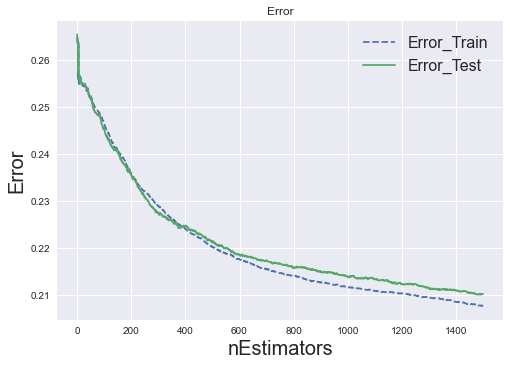

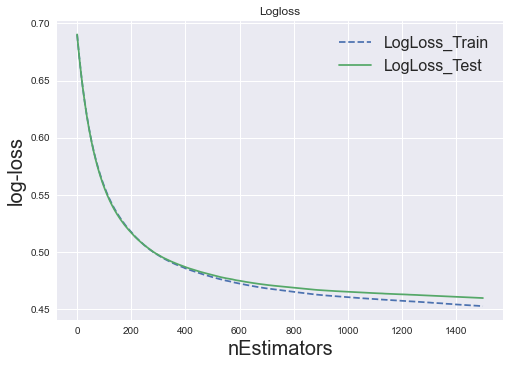

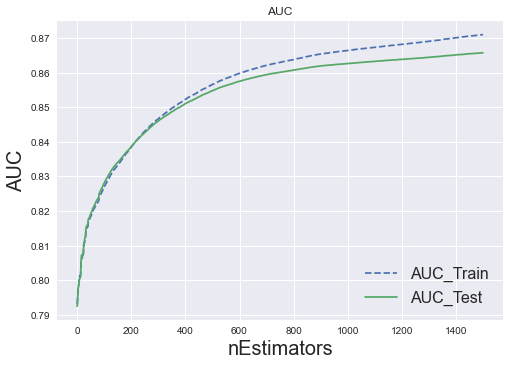

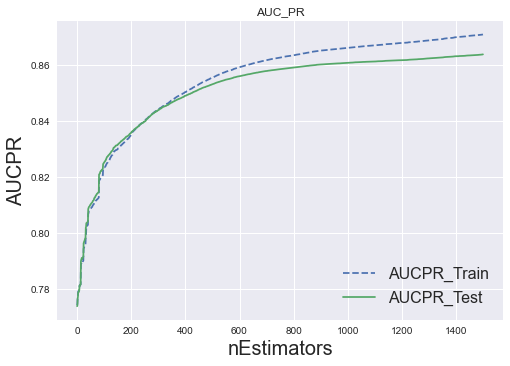

Best score : 0.459437, Best iteration : 1499


<Figure size 576x396 with 0 Axes>

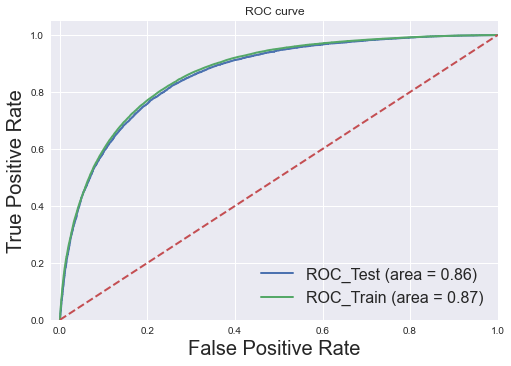

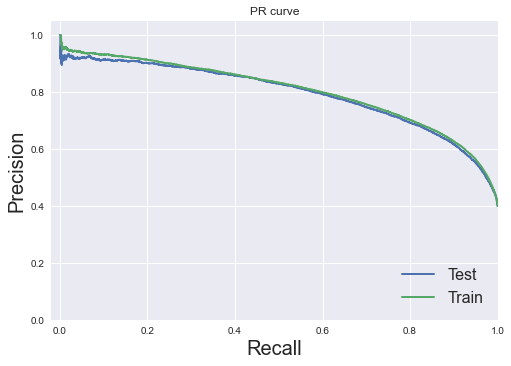

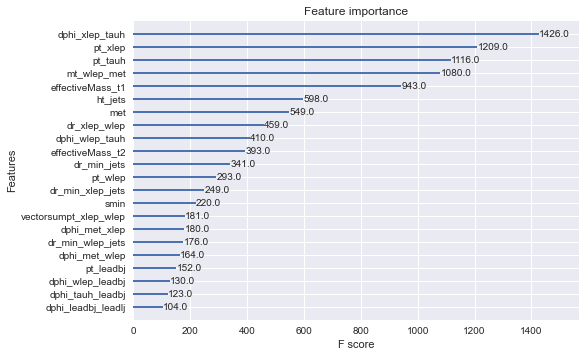

In [11]:
with open('config_train_MX60_DL.yaml','r') as conf:
    config = yaml.safe_load(conf)
mainkeys    = list(config.keys())
tag         = config.get('Tag')
pwd         = os.getcwd()
tagdir      = os.path.join(pwd,tag)

if not os.path.exists(tag):
    os.mkdir(tagdir)
else:
    print(f'{tagdir} already exists ...')

maintree    = config.get('intree')
infiledict  = config.get('infiles')
#print(infiledict)
clskeys = list(infiledict.keys())
#print(clskeys)
featurelist = config.get('features') 

signaldict = infiledict.get('Signal')
backgrounddict = infiledict.get('Background')


'''
# List of list [['sample1_path',xsec1], ['sample2_path', xsec2], ......]
signal_root_df_list = list(signaldict.values())
background_root_df_list = list(backgrounddict.values())

dfs_signal = []
dfs_background = []
for item in signal_root_df_list:
    path  = item[0]
    clswt = item[1] # xsec
    dfitem = rpd.read_root(path, key=maintree)[featurelist]
    dfitem['tag'] = 1
    dfs_signal.append(dfitem)

for item in background_root_df_list:
    path  = item[0]
    clswt = item[1] # xsec
    dfitem = rpd.read_root(path, key=maintree)[featurelist]
    dfitem['tag'] = 0
    dfs_background.append(dfitem)

print(f'No of signal processes : {len(dfs_signal)}, bkg processes : {len(dfs_background)}')

sigtrain, sigtest   = train_test_split(dfs_signal[0],     test_size=0.2, random_state=42, shuffle=True)
bkg1train, bkg1test = train_test_split(dfs_background[0], test_size=0.2, random_state=42, shuffle=True)
bkg2train, bkg2test = train_test_split(dfs_background[1], test_size=0.2, random_state=42, shuffle=True)
bkg3train, bkg3test = train_test_split(dfs_background[2], test_size=0.2, random_state=42, shuffle=True)
      
df_train = pd.concat([sigtrain,bkg1train,bkg2train,bkg3train])
df_train.sample(frac=1)
df_test  = pd.concat([sigtest,bkg1test,bkg2test,bkg3test])
df_test.sample(frac=1)

# For Correlation matrix #
df_sig = (pd.concat(dfs_signal)).iloc[:,:-1]
df_bkg = (pd.concat(dfs_background)).iloc[:,:-1]
corrlMatrix_sig = df_sig.corr()
corrlMatrix_bkg = df_bkg.corr()

plt.figure(figsize=(15,12.5))
sns.heatmap(corrlMatrix_sig, cmap='YlGnBu', annot=True, annot_kws={'size':13}, fmt='.2f')
plt.title('Correlation Matrix [Signal]')
plt.savefig(os.path.join(tagdir,'Corr_matrix_signal.png'), dpi=300)
plt.show()
plt.clf()
plt.figure(figsize=(15,12.5))
sns.heatmap(corrlMatrix_bkg, cmap='YlGnBu', annot=True, annot_kws={'size':13}, fmt='.2f')
plt.title('Correlation Matrix [Background]')
plt.savefig(os.path.join(tagdir,'Corr_matrix_bkg.png'), dpi=300)
plt.show()
plt.clf()
###########################
'''

signal_info_list     = list(signaldict.values())
background_info_list = list(backgrounddict.values())

dfs_signal     = []
dfs_background = []
for item in signal_info_list:
    path   = item[0]
    xsec   = item[1] # xsec
    nEvProd= item[2]   
    dfitem = rpd.read_root(path, key=maintree)[featurelist]
    dfitem['tag'] = 1
    #dfitem['tag'] = np.ones(dfitem.shape[0])
    #dfitem['wtd_events'] = np.ones(dfitem.shape[0])
    ##dfitem['wtd_events'] = dfitem.shape[0]
    dfitem['wt'] = 1.0/nEvProd
    dfs_signal.append(dfitem)

for item in background_info_list:
    path  = item[0]
    xsec  = item[1] # xsec
    nEvProd= item[2]
    dfitem = rpd.read_root(path, key=maintree)[featurelist]
    #dfitem['tag'] = np.zeros(dfitem.shape[0])
    dfitem['tag'] = 0
    #dfitem['wtd_events'] = xsec*np.ones(dfitem.shape[0])
    #dfitem['wtd_events'] = xsec*dfitem.shape[0]
    dfitem['wt'] = xsec/nEvProd
    dfs_background.append(dfitem)

print(f'No of signal processes : {len(dfs_signal)}, bkg processes : {len(dfs_background)}')
df_total_sig = pd.concat(dfs_signal)
df_total_sig['rel_weight'] = 1.0
totwt = 0.0
for df in dfs_background:
    #print(f'''backgrounddddddd : {df['wt']}  : shape : {df.shape[0]} \n\n''')
    totwt += df['wt'][0] * df.shape[0]

for df in dfs_background:
    df['rel_weight'] = df['wt'] * df.shape[0] / totwt
    
df_total_bkg = pd.concat(dfs_background)      

sigtrain,  sigtest  = train_test_split(df_total_sig,  test_size=0.2,   random_state=42, shuffle=True)
bkgtrain,  bkgtest  = train_test_split(df_total_bkg,  test_size=0.2,   random_state=42, shuffle=True)

df_train = pd.concat([sigtrain,bkgtrain])
df_train.sample(frac=1)
df_test  = pd.concat([sigtest,bkgtest])
df_test.sample(frac=1)

train_weight = df_train [['rel_weight']].to_numpy()
test_weight  = df_test  [['rel_weight']].to_numpy()

df_train = df_train[featurelist + ['tag']]
df_test  = df_test [featurelist + ['tag']]

np_train = df_train.to_numpy()
np_test  = df_test.to_numpy()

x_train = np_train[:,:np_train.shape[1]-1]
y_train = np_train[:,-1]
print(x_train.shape)
x_test  = np_test[:,:np_test.shape[1]-1]
y_test  = np_test[:,-1]
print(x_test.shape)

print(f'Train --> Sig : {np.sum(y_train > 0)}   Bkg : {np.sum(y_train < 1)}')
print(f'Test  --> Sig : {np.sum(y_test > 0)}    Bkg : {np.sum(y_test < 1)}')

#############################################
#############################################
D_train = xgb.DMatrix(x_train, label = y_train, feature_names = featurelist, weight=train_weight)
D_test  = xgb.DMatrix(x_test,  label = y_test, feature_names = featurelist, weight=test_weight)
watchlist = [(D_train, 'train'), (D_test, 'test')]
print(D_train)
#############################################
#############################################
prog = dict()
max_iter = 1000
eta_min = 0.001
eta_max = 0.5
eta_decay = np.linspace(eta_min, eta_max, max_iter).tolist()
params = {
        "nthread":-1,
        "objective": "binary:logistic",
        "booster" : "gbtree",
        "eval_metric": ['error','auc','aucpr','logloss'], 
        "eta": 0.01,#0.03 #0.01
        "n_estimators": 500,
        #"tree_method": 'exact',
        #"gpu_id" : -1,
        "tree_method": 'auto',
        #"predictor": "gpu_predictor",
        #"updater": "grow_gpu",
        "max_depth": 3,#3 #2
        "subsample": 1,
        "colsample_bytree": 1,
        "silent": 1,
        "min_child_weight": 1
        #"callbacks": [xgb.callback.LearningRateScheduler(eta_decay)]
    }
num_boost_round = 1500
early_stopping_rounds = 10
#############################################
#############################################
model = xgb.train(params, D_train, num_boost_round, watchlist,
                  early_stopping_rounds=early_stopping_rounds, 
                  evals_result=prog,verbose_eval=True)
#############################################
#############################################
best_tree = model.best_iteration
model.save_model(os.path.join(tagdir,'XGB_test.json'))
model.save_model(os.path.join(tagdir,'XGB_test.model'))
model.dump_model(os.path.join(tagdir,'XGB_dump.txt'))
#############################################
#############################################
preds_train = model.predict(D_train, ntree_limit=model.best_iteration)
preds = model.predict(D_test, ntree_limit=model.best_iteration)
print(preds)
#############################################
#############################################
#result = model.evals_result()
prog['train']['error']
plt.plot(prog['train']['error'], linestyle='dashed',label='Error_Train')
plt.plot(prog['test']['error'], linestyle='solid', label='Error_Test')
plt.title('Error')
plt.legend(loc="upper right", fontsize=16)
plt.xlabel('nEstimators', size=20)
plt.ylabel('Error', size=20)
plt.savefig(os.path.join(tagdir,'Error.png'),dpi=300)
plt.show()
plt.clf()
plt.plot(prog['train']['logloss'], linestyle='dashed',label='LogLoss_Train')
plt.plot(prog['test']['logloss'], linestyle='solid', label='LogLoss_Test')
plt.title('Logloss')
plt.legend(loc="upper right", fontsize=16)
plt.xlabel('nEstimators', size=20)
plt.ylabel('log-loss', size=20)
plt.savefig(os.path.join(tagdir,'LogLoss.png'),dpi=300)
plt.show()
plt.clf()
plt.plot(prog['train']['auc'], linestyle='dashed',label='AUC_Train')
plt.plot(prog['test']['auc'], linestyle='solid', label='AUC_Test')
plt.title('AUC')
plt.legend(loc="lower right", fontsize=16)
plt.xlabel('nEstimators', size=20)
plt.ylabel('AUC', size=20)
plt.savefig(os.path.join(tagdir,'AUC.png'), dpi=300)
plt.show()
plt.clf()
plt.plot(prog['train']['aucpr'], linestyle='dashed',label='AUCPR_Train')
plt.plot(prog['test']['aucpr'], linestyle='solid', label='AUCPR_Test')
plt.title('AUC_PR')
plt.legend(loc="lower right", fontsize=16)
plt.xlabel('nEstimators', size=20)
plt.ylabel('AUCPR', size=20)
plt.savefig(os.path.join(tagdir,'AUCPR.png'), dpi=300)
plt.show()
plt.clf()

print(f'Best score : {model.best_score}, Best iteration : {model.best_iteration}')
#############################################
#############################################
fpr_t, tpr_t, _ = roc_curve(y_train, preds_train)
fpr, tpr, _ = roc_curve(y_test, preds)
roc_auc_t = auc(fpr_t, tpr_t)
roc_auc = auc(fpr, tpr)
#xgb.plot_importance(gbm)
#plt.show()
plt.figure()
lw = 2
plt.plot(fpr, tpr,
         lw=lw, label='ROC_Test (area = %0.2f)' % roc_auc)
plt.plot(fpr_t, tpr_t,
         lw=lw, label='ROC_Train (area = %0.2f)' % roc_auc_t)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',size=20)
plt.ylabel('True Positive Rate',size=20)
plt.title('ROC curve')
plt.legend(loc="lower right", fontsize=16)
plt.savefig(os.path.join(tagdir,'ROC.png'), dpi=300)
plt.show()
#############################################
#############################################
pr_t, rc_t, _ = precision_recall_curve(y_train, preds_train)
pr, rc, _ = precision_recall_curve(y_test, preds)
#auc_t = auc(pr_t, rc_t)
#auc   = auc(pr, rc)
#xgb.plot_importance(gbm)
#plt.show()
plt.figure()
lw = 2
plt.plot(rc, pr, lw=lw, label='Test')
plt.plot(rc_t, pr_t, lw=lw, label='Train')
#plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall',size=20)
plt.ylabel('Precision',size=20)
plt.title('PR curve')
plt.legend(loc="lower right", fontsize=16)
plt.savefig(os.path.join(tagdir,'PR.png'), dpi=300)
plt.show()
#############################################
#############################################
impplot = xgb.plot_importance(model)
#plot = impplot.plot()
#fig = plot.get_figure()
plt.savefig(os.path.join(tagdir,'feature_importance.png'), dpi=300)
#############################################
#############################################
#xgb.to_graphviz(model, num_tress=2)

# Application

In [88]:
'See `XGBoost_application`'

'See `XGBoost_application`'